In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Disease.csv')

In [ ]:
df1 = df.copy()

In [ ]:
df = df[~(df['BMI']>42)]

In [ ]:
df.drop_duplicates()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0,0,No,Female,18-24,Hispanic,No,Yes,Excellent,8,No,No,No
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No


In [ ]:
df['AgeCategory'] = df['AgeCategory'].replace(('80 or older'), ('80-0'))
df['AgeCategory']=df['AgeCategory'].str.replace(pat=r'-',repl=' ', regex=False)
df['AgeCategory']=df['AgeCategory'].str.split()
df['Min AgeCategory'] = df['AgeCategory'].apply(lambda x: x[0])
df['AgeCategory'] = df['Min AgeCategory'].astype('int')

In [ ]:
df['AgeCategory']

0         55
1         80
2         65
3         75
4         40
          ..
319789    18
319790    60
319791    35
319792    45
319793    25
Name: AgeCategory, Length: 308648, dtype: int64

In [ ]:
df = df.drop(['Min AgeCategory'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40,5,0,1,4,8,0,0,0


In [ ]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [ ]:
from imblearn.under_sampling import NearMiss
nrms = NearMiss()

In [ ]:
X, Y = nrms.fit_resample(x, y)

In [ ]:
Y.value_counts()

0    26102
1    26102
Name: HeartDisease, dtype: int64

Extra Tree Calssifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extr = ExtraTreesClassifier()

In [ ]:
import numpy as np
trees = np.random.randint(15,150,30)

In [ ]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]
ccp_alpha = [0.00,0.001,0.00001 ]
grids = {
    'n_estimators' : trees,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'criterion' : criterion,
    'min_samples_split' : min_samples_split,
    'ccp_alpha': ccp_alpha
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rcv = RandomizedSearchCV(extr, grids, n_iter=10, cv=5)

In [ ]:
rcv.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 6,  8,  4,  7,  5,  5,  3,  7, 11,  3,  4,  2,  8, 10, 11,  6,  3,
        8, 10,  2,  7, 11,  2, 11, 10,  7,  6,  5,  8,  5,  3, 11,  6,  8,
        3,  7, 10, 10,  5,  5,  8,  5,  7,  4,  7, 10,  3,  4,  7,  7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([125,  63,  79, 112,  50,  99,  90,  69,  67, 138,  98,  28, 140,
        94, 121, 119,  59,  41,  71,  41,  77,  96,  32,  20, 146,  61,
       142,  64, 104,  72])})

In [ ]:
rcv.best_params_

{'n_estimators': 146,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [ ]:
extr2 = rcv.best_estimator_

In [ ]:
extr2

ExtraTreesClassifier(criterion='entropy', max_depth=11, max_features='log2',
                     min_samples_split=4, n_estimators=146)

In [ ]:
extr2.fit(X,Y)

ExtraTreesClassifier(criterion='entropy', max_depth=11, max_features='log2',
                     min_samples_split=4, n_estimators=146)

In [ ]:
feature_importance = extr2.feature_importances_
feature_importance #info gain

array([0.00753528, 0.009514  , 0.00453362, 0.06809103, 0.22909923,
       0.10143535, 0.17173999, 0.00253669, 0.00740217, 0.05768729,
       0.09655945, 0.08976406, 0.04968084, 0.00664747, 0.05406306,
       0.03349197, 0.01021851])

In [ ]:
x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [ ]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
gains = pd.concat([cols,imp],axis=1)


In [ ]:
gains.nlargest(15,'Gain_Score')

,Feature_Names,Gain_Score
4,PhysicalHealth,0.229099
6,DiffWalking,0.171740
5,MentalHealth,0.101435
10,Diabetic,0.096559
11,PhysicalActivity,0.089764
3,Stroke,0.068091
9,Race,0.057687
14,Asthma,0.054063
12,GenHealth,0.049681
15,KidneyDisease,0.033492


<AxesSubplot:>

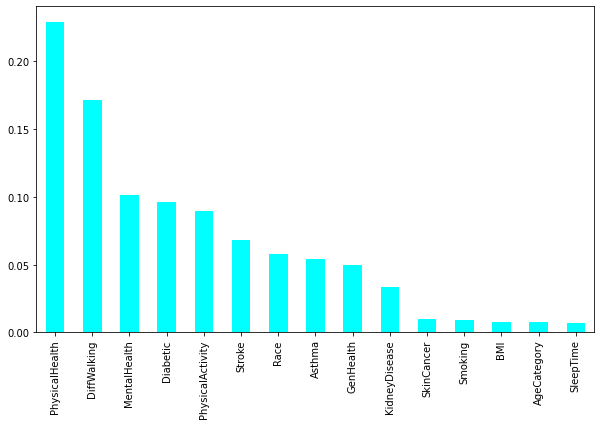

In [ ]:
import matplotlib.pyplot as plt
features = pd.Series(extr2.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(15).plot(kind='bar', color='cyan')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
x_pca = pca.fit(X)

In [ ]:
print("Explained Variance: %s" % x_pca.explained_variance_ratio_)
print(x_pca.components_)

Explained Variance: [0.44426953 0.34487193 0.11726317]
[[ 9.25928570e-02  2.10724041e-03  1.07198625e-03  1.81896921e-03
   2.79968720e-01  2.60577481e-01  3.68233131e-03  3.15622454e-03
  -9.18760712e-01 -1.35313429e-02  4.29093155e-03 -2.33341893e-03
  -9.60032300e-03 -2.52250624e-02  4.61418943e-03  7.44540554e-04
  -5.70266894e-03]
 [ 3.96195187e-02  7.58578658e-03  4.09062849e-04  6.97288222e-03
   8.37456578e-01  3.96023379e-01  2.14874798e-02 -7.23653856e-03
   3.72214914e-01 -9.30975305e-03  2.17528048e-02 -1.58523086e-02
  -1.11546850e-02 -7.85995974e-03  6.14094384e-03  6.16142289e-03
   4.98694388e-03]
 [-7.38019813e-02  1.95948802e-03  9.77231883e-04  6.14729449e-04
  -4.58226557e-01  8.79680773e-01 -2.25661196e-03 -7.51395270e-03
   1.02706226e-01 -4.23373262e-03 -3.19136438e-03  8.99394736e-04
  -4.69629430e-05 -9.78065528e-03  1.07906288e-03 -9.01587021e-04
   1.25491449e-03]]


In [ ]:
x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [ ]:
import numpy as np
pc= np.array(x_pca.components_)

In [ ]:
features = pd.DataFrame(pc, columns=x.columns)

In [ ]:
features

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.092593,0.002107,0.001072,0.001819,0.279969,0.260577,0.003682,0.003156,-0.918761,-0.013531,0.004291,-0.002333,-0.009600,-0.025225,0.004614,0.000745,-0.005703
1,0.039620,0.007586,0.000409,0.006973,0.837457,0.396023,0.021487,-0.007237,0.372215,-0.009310,0.021753,-0.015852,-0.011155,-0.007860,0.006141,0.006161,0.004987
2,-0.073802,0.001959,0.000977,0.000615,-0.458227,0.879681,-0.002257,-0.007514,0.102706,-0.004234,-0.003191,0.000899,-0.000047,-0.009781,0.001079,-0.000902,0.001255


In [ ]:
df3 = features.transpose()

In [ ]:
df3 = df3.set_axis(['PC1', 'PC2', 'PC3'], axis='columns')

In [ ]:
df3.PC1

BMI                 0.092593
Smoking             0.002107
AlcoholDrinking     0.001072
Stroke              0.001819
PhysicalHealth      0.279969
MentalHealth        0.260577
DiffWalking         0.003682
Sex                 0.003156
AgeCategory        -0.918761
Race               -0.013531
Diabetic            0.004291
PhysicalActivity   -0.002333
GenHealth          -0.009600
SleepTime          -0.025225
Asthma              0.004614
KidneyDisease       0.000745
SkinCancer         -0.005703
Name: PC1, dtype: float64

<AxesSubplot:title={'center':'First Principle Component'}>

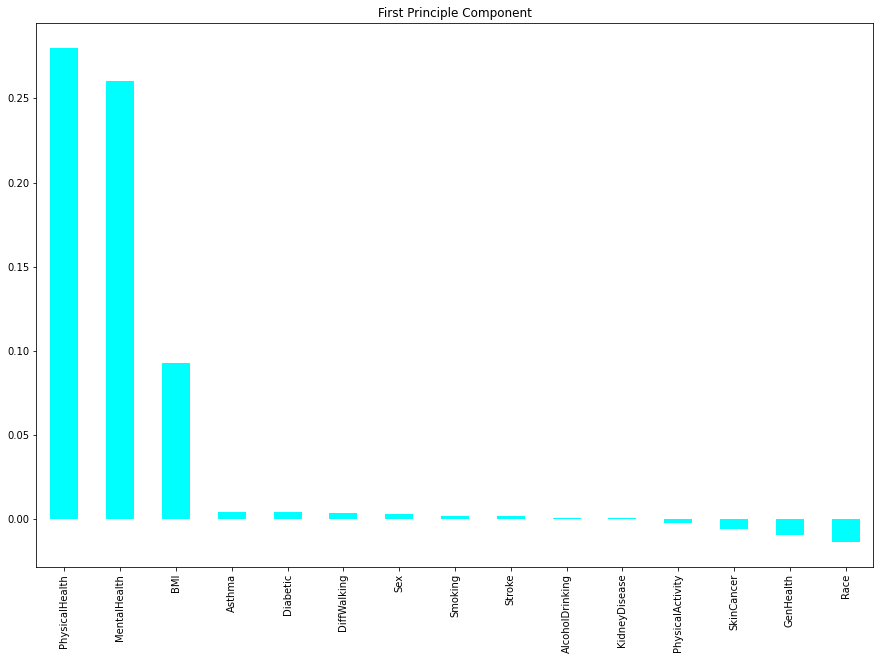

In [ ]:
import matplotlib.pyplot as plt
features = pd.Series(df3.PC1, index = x.columns)
plt.figure(figsize=(15,10))
plt.title('First Principle Component')
features.nlargest(15).plot(kind='bar', color='cyan')

<AxesSubplot:title={'center':'Second Principle Component'}>

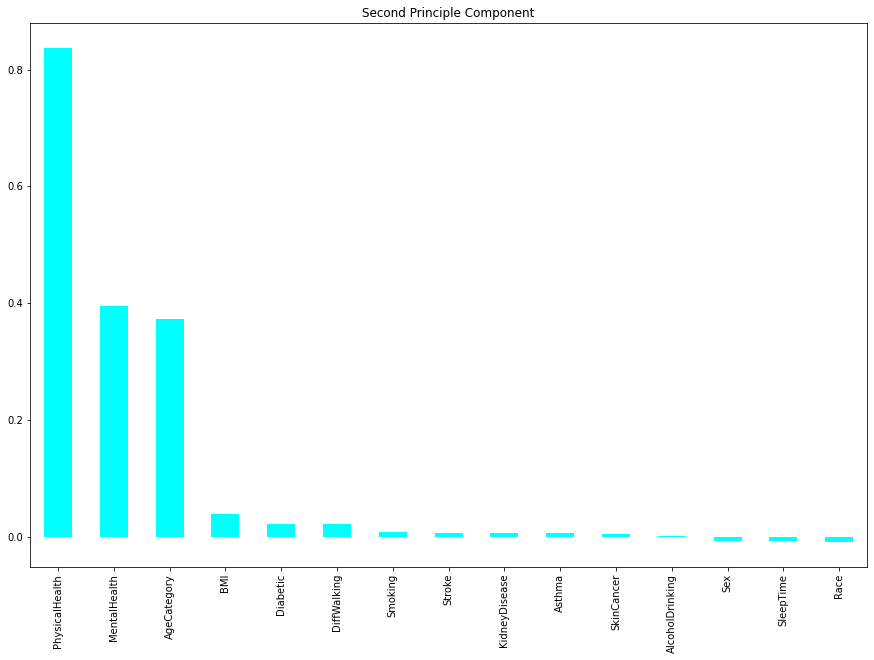

In [ ]:
import matplotlib.pyplot as plt
features = pd.Series(df3.PC2, index = x.columns)
plt.figure(figsize=(15,10))
plt.title('Second Principle Component')
features.nlargest(15).plot(kind='bar', color='cyan')

<AxesSubplot:title={'center':'Third Principle Component'}>

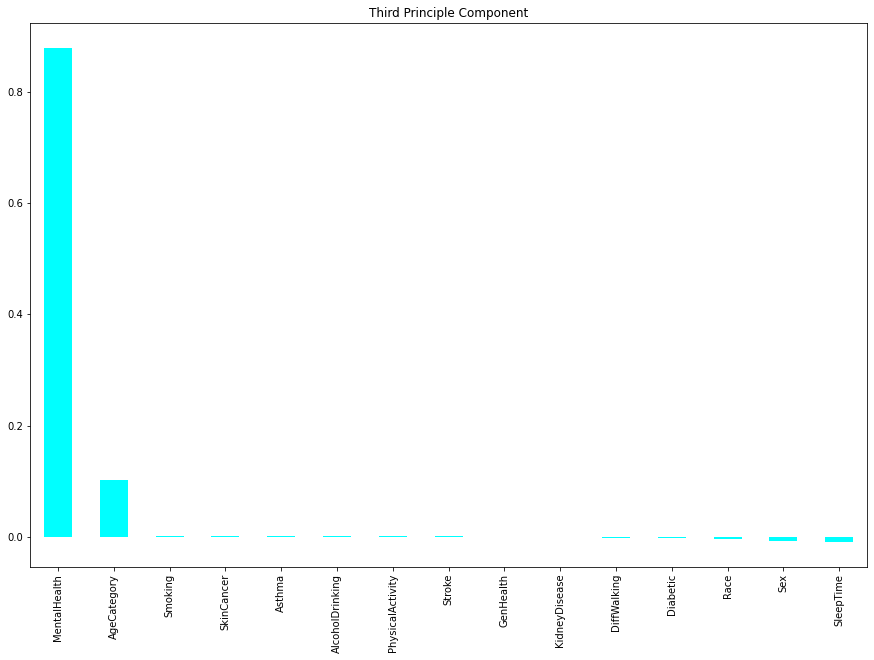

In [ ]:
import matplotlib.pyplot as plt
features = pd.Series(df3.PC3, index = x.columns)
plt.figure(figsize=(15,10))
plt.title('Third Principle Component')
features.nlargest(15).plot(kind='bar', color='cyan')